# THE SPARK FOUNDATION
 ## GRIP APR2021
 ## Data Science & Business Analytics Internship
 ## ***Prediction using Supervised ML***

## NOTEBOOK AUTHOR: DEBRAJ KUNDU

# Task 1
## Predict the percentage of an student based on the no. of study hours.

# Problem Statement
***What will be predicted score if a student studies for 9.25 hrs/ day?***

# Dataset : 
The data is available at http://bit.ly/w-data


# #Importing libraries

In [6]:
%matplotlib inline
import pandas as pd
import numpy as np  
import matplotlib.pyplot as plt  
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score, accuracy_score
from sklearn.linear_model import LinearRegression

# # Loading The Dataset

In [7]:
url = "http://bit.ly/w-data"
df = pd.read_csv(url)
print("The data is loaded")
df

The data is loaded


,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60
8,8.3,81
9,2.7,25


# # Data Analysing 

In [8]:
df.shape

(25, 2)

In [9]:
df.columns

Index(['Hours', 'Scores'], dtype='object')

#### Data has only two features :i) Hours & ii) Scores

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


In [11]:
df.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


#### After using info and describe , wew can see that data has no null values.

In [12]:
df.corr()

,Hours,Scores
Hours,1.000000,0.976191
Scores,0.976191,1.000000


In [13]:
df.isnull().any()

Hours     False
Scores    False
dtype: bool

In [14]:
df.isnull().sum()

Hours     0
Scores    0
dtype: int64

In [15]:
df.mean()

Hours      5.012
Scores    51.480
dtype: float64

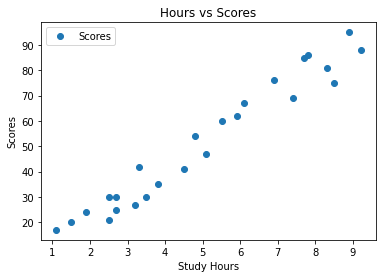

In [16]:
# Plotting the distribution of scores
df.plot(x='Hours', y='Scores', style='o')  
plt.title('Hours vs Scores')  
plt.xlabel('Study Hours')  
plt.ylabel('Scores')  
plt.show()

### We can see from the graph that there is a linear relationship between study hours and scores
### There is linearity in data and there is no other feature, so we can perform linear regression

# #Data Preparation

In [17]:
X = df.iloc[:, :-1].values  
y = df.iloc[:, 1].values  

In [18]:
from sklearn.model_selection import train_test_split                # 1. split this data into training and test sets
                                                                    # 2. using Scikit-Learn's built-in train_test_split() method)
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                            test_size=0.2, random_state=0) 

In [19]:
X,y

(array([[2.5],
        [5.1],
        [3.2],
        [8.5],
        [3.5],
        [1.5],
        [9.2],
        [5.5],
        [8.3],
        [2.7],
        [7.7],
        [5.9],
        [4.5],
        [3.3],
        [1.1],
        [8.9],
        [2.5],
        [1.9],
        [6.1],
        [7.4],
        [2.7],
        [4.8],
        [3.8],
        [6.9],
        [7.8]]),
 array([21, 47, 27, 75, 30, 20, 88, 60, 81, 25, 85, 62, 41, 42, 17, 95, 30,
        24, 67, 69, 30, 54, 35, 76, 86], dtype=int64))

In [20]:
X_train,len(X_train), y_train,len(y_train)

(array([[3.8],
        [1.9],
        [7.8],
        [6.9],
        [1.1],
        [5.1],
        [7.7],
        [3.3],
        [8.3],
        [9.2],
        [6.1],
        [3.5],
        [2.7],
        [5.5],
        [2.7],
        [8.5],
        [2.5],
        [4.8],
        [8.9],
        [4.5]]),
 20,
 array([35, 24, 86, 76, 17, 47, 85, 42, 81, 88, 67, 30, 25, 60, 30, 75, 21,
        54, 95, 41], dtype=int64),
 20)

# Training The Model

In [21]:
model =LinearRegression()

In [22]:
model.fit(X_train,y_train)

LinearRegression()

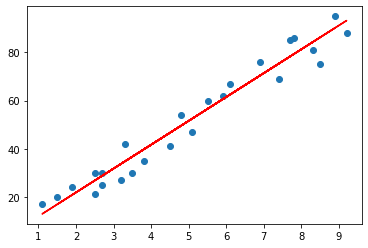

In [23]:
# Plotting the regression line
line = model.coef_*X+model.intercept_

# Plotting for the test data
plt.scatter(X, y)
plt.plot(X, line,color = 'red');
plt.show()

# #Prediction

In [24]:
print(X_test) # Testing data
y_pred = model.predict(X_test) # Predicting the scores

[[1.5]
 [3.2]
 [7.4]
 [2.5]
 [5.9]]


In [25]:
# Comparing Actual vs Predicted
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})  
df

,Actual,Predicted
0,20,16.884145
1,27,33.732261
2,69,75.357018
3,30,26.794801
4,62,60.491033


### Q: What will be predicted score if a student studies for 9.25 hrs/ day?

In [26]:
# Answer:
hours = np.array(9.25).reshape(1,-1)
#hours.reshape(1,-1)
own_pred = model.predict(hours)
print("No of Hours = {}".format(hours))
print("Predicted Score = {}".format(own_pred[0]))

No of Hours = [[9.25]]
Predicted Score = 93.69173248737538


# #Evaluation The Model

### Mean Square Error & Root Mean Square Error

In [27]:
m = mean_squared_error(y_test, y_pred)
rm = np.sqrt(m)

print('Mean square error: ', m)
print('Root mean square error: ', rm)

Mean square error:  21.5987693072174
Root mean square error:  4.6474476121003665


### Mean Absoulte Error

In [28]:
m = mean_absolute_error(y_test, y_pred)
print('Mean absolute error: ', m)

Mean absolute error:  4.183859899002975


### R Squared 

In [30]:
print('R Squared: ', r2_score(y_test,y_pred)) # R Squared value is close to 1 so our model is quite accurate.

R Squared:  0.9454906892105356


# Experimentation

## Pickle String

In [31]:
import pickle
with open('Student_Marks.pkl','wb') as f:
    pickle.dump(model, f)

In [32]:
model.predict([[9.25]])

array([93.69173249])

In [33]:
import os
os.listdir()
['Student_Marks.pkl']

['Student_Marks.pkl']

## Pickled model as a file using joblib

In [34]:
import joblib
joblib.dump(model,"Student_Marks_Predictor.pkl")

['Student_Marks_Predictor.pkl']

In [35]:
M = joblib.load('Student_Marks_Predictor.pkl')

In [36]:
M.predict([[9.25]])

array([93.69173249])